In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\SONAI\Desktop\Project\Big_Mart\Big-Mart.csv')
# First Five Observations
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Understanding

In [3]:
# Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [4]:
# Finding categorical variables
categorical_variables = [var for var in df.columns if df[var].dtype=='object']
print('There are {} categorical variables'.format(len(categorical_variables)))
print('--'*45)
print(categorical_variables)

There are 7 categorical variables
------------------------------------------------------------------------------------------
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [5]:
# Finding numerical variables
numerical_variables = [var for var in df.columns if df[var].dtype!='object']
print('There are {} numerical variables'.format(len(numerical_variables)))
print('--'*45)
print(numerical_variables)

There are 5 numerical variables
------------------------------------------------------------------------------------------
['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


In [6]:
# Checking shape of the dataset
df.shape

(14204, 12)

There are 14204 rows(intances) and 12 columns(11 featured and 1 Target)

In [7]:
# Basic description of Dataset
df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,14204,11765.000000,14204,14204.000000,14204,14204.000000,14204,14204.000000,10188,14204,14204,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDU15,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,8485,NaN,2013,NaN,1559,NaN,4655,5583,9294,NaN
mean,NaN,12.792854,NaN,0.065953,NaN,141.004977,NaN,1997.830681,NaN,NaN,NaN,2181.288914
std,NaN,4.652502,NaN,0.051459,NaN,62.086938,NaN,8.371664,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.710000,NaN,0.027036,NaN,94.012000,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.054021,NaN,142.247000,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.750000,NaN,0.094037,NaN,185.855600,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [8]:
# number of unique values in each columns
df.nunique()

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3493
dtype: int64

There, 1559 unique products of 16 different types are available across 10 unique outlets(Stores) of 4 different types at 3 different location. And Item_Fat_Content are 5 types.

In [9]:
# The unique values in each column
for var in df.columns:
    print(var,'\n\n',df[var].unique(),'\n')
    print('--'*45)


Item_Identifier 

 ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05'] 

------------------------------------------------------------------------------------------
Item_Weight 

 [ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5
  6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25
  8.6   12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6
 14.    16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2
 14.5   13.1   12.3   11.1   11.3    5.75  11.35   6.525 10.3    5.78
 11.85  18.75   5.26  16.1    9.5   13.8   14.65   6.

In [10]:
#Count of unique values in each column  
for var in df.columns:
    print(df[var].value_counts(dropna=False))
    print('--'*45)

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64
------------------------------------------------------------------------------------------
NaN       2439
17.600     135
12.150     127
10.500     123
13.650     115
          ... 
7.640        7
5.905        7
7.850        6
4.615        6
9.035        6
Name: Item_Weight, Length: 416, dtype: int64
------------------------------------------------------------------------------------------
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
------------------------------------------------------------------------------------------
0.000000    879
0.076841      3
0.077011      3
0.077169      3
0.076792      3
           ... 
0.162572      1
0.014826      1
0.058034      1
0.043786      1
0.104720      1
Name: Item_Visibility, Length: 13006, dtyp

In [11]:
# Checking for number of null values in dataset
df.isna().sum().sort_values(ascending=False)

Item_Outlet_Sales            5681
Outlet_Size                  4016
Item_Weight                  2439
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

There are 5681 null values in Item_Outlet_Sales, 4016 null values in Outlet_Size and 2439 null values in Item_Weight. Note that item visibility has 0 value which has no significance.

In [12]:
# Checking duplicated values in dataset
count_duplicated = df.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 0 duplicated values



# Data Cleaning , Feature Engineering and EDA

In [13]:
#Drop all rows that contains null values for Target Variable 'Item_Outlet_Sales'
df.dropna(subset=['Item_Outlet_Sales'], inplace=True)

In [14]:
# Replacing null values with the most frequent value in categorical variable 'Outlet_Size'
df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

#Replacing null values with the nearest neighbour value in categorical variable 'Outlet_Size'
#from sklearn.impute import KNNImputer

#Encoding Categorical Outlet Size
#df['Outlet_Size'] = df['Outlet_Size'].map({'Medium':0,'High':1,'Small':2})

# Create a KNNImputer object
#knnImputer = KNNImputer(n_neighbors=1)  # Adjust n_neighbors as 1

# Impute missing values in 'Outlet_Size'
#df['Outlet_Size'] = knnImputer.fit_transform(df[['Outlet_Size']])

In [15]:
df['Outlet_Size'].value_counts(dropna=False)

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [16]:
#Replacing null with mean for numerical variables 'Item_Weight'
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [17]:
## Drop rows where 'Item_Visibility' is 0
#df = df[df['Item_Visibility'] != 0]

In [18]:
# Basic description of Dataset after cleaning
df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,8523.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,8523,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,5203,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.226124,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,9.310000,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.857645,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.000000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [19]:
# Basic information of dataset after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [20]:
# Verify if all null and irrelavent values are removed
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

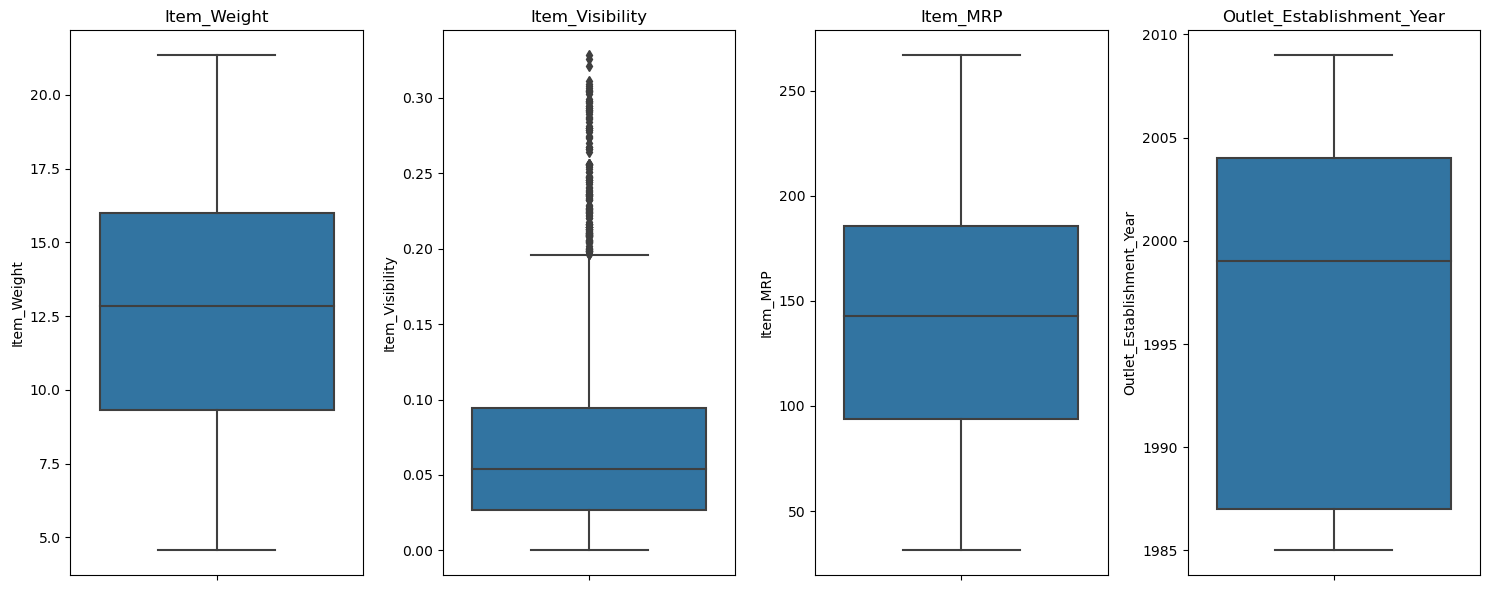

In [21]:
# Box plot to visualizing outliers
fig, axes = plt.subplots(1,(len(numerical_variables)-1), figsize=(15, 6))
axes = axes.flatten()

for i, var in enumerate(numerical_variables):
    if i<(len(numerical_variables)-1):
        sns.boxplot(y=df[var], ax=axes[i])
        axes[i].set_title(var)
    else:
        pass
    

plt.tight_layout()
plt.show()

In [22]:
#Replacing outliers by upper limit and lower limit
#for var in numerical_variables:
#        Q1= df[var].quantile(0.25)
#        Q3 = df[var].quantile(0.75)
#       IQR = Q3 - Q1
#        upper_limit = Q3 + 1.5 * IQR
#        lower_limit = Q1 - 1.5 * IQR
#        df.loc[(df[var] > upper_limit),var] = upper_limit
#        df.loc[(df[var] < lower_limit),var] = lower_limit

In [23]:
'''
#Replacing outliers by upper limit and lower limit except the Target Variable
for i, var in enumerate(numerical_variables):
    if i < (len(numerical_variables)-1):
        Q1= df[var].quantile(0.25)
        Q3 = df[var].quantile(0.75)
        IQR = Q3 - Q1
        upper_limit = Q3 + 1.5 * IQR
        lower_limit = Q1 - 1.5 * IQR
        df.loc[(df[var] > upper_limit),var] = upper_limit
        df.loc[(df[var] < lower_limit),var] = lower_limit
'''

'\n#Replacing outliers by upper limit and lower limit except the Target Variable\nfor i, var in enumerate(numerical_variables):\n    if i < (len(numerical_variables)-1):\n        Q1= df[var].quantile(0.25)\n        Q3 = df[var].quantile(0.75)\n        IQR = Q3 - Q1\n        upper_limit = Q3 + 1.5 * IQR\n        lower_limit = Q1 - 1.5 * IQR\n        df.loc[(df[var] > upper_limit),var] = upper_limit\n        df.loc[(df[var] < lower_limit),var] = lower_limit\n'

In [24]:
'''
# Box Plot after handling outliers
fig, axes = plt.subplots(1, len(numerical_variables), figsize=(15, 6))
axes = axes.flatten()

for i, var in enumerate(numerical_variables):
    sns.boxplot(y=df[var], ax=axes[i])
    axes[i].set_title(var)

plt.tight_layout()
plt.show()
'''

'\n# Box Plot after handling outliers\nfig, axes = plt.subplots(1, len(numerical_variables), figsize=(15, 6))\naxes = axes.flatten()\n\nfor i, var in enumerate(numerical_variables):\n    sns.boxplot(y=df[var], ax=axes[i])\n    axes[i].set_title(var)\n\nplt.tight_layout()\nplt.show()\n'

In [25]:
#Count of unique values in Categorical column  
for var in categorical_variables:
    print(df[var].value_counts(dropna=False))
    print('--'*45)

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
------------------------------------------------------------------------------------------
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
------------------------------------------------------------------------------------------
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
---------

In [26]:
#There is a similarity between Item_Identifier and Item_Type
#Item_Type has been changed according to that similarity
df['Item_Type'] = df['Item_Identifier'].str[:2]
df['Item_Type'] = df['Item_Type'].replace({'FD': 'Food', 'DR': 'Drinks', 'NC': 'Non-Consumable'})
df.Item_Type.value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type, dtype: int64

In [27]:
# Replace reapted values in Item_Fat_Content
df['Item_Fat_Content'] = df.Item_Fat_Content.replace(['LF', 'low fat', 'reg'],['Low Fat','Low Fat', 'Regular'])
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Item_identifier ID has first two charachters defining the item type, these are FD, DR, NC means 'Food', 'Drinks', 'Non-Consumables'. Converting Item_Type into these 3 categories Food, Drinks,Non-Consumable. And repeated values in 'Item_Fat_Content' are replaced.

In [28]:
# number of unique values in each categorical_variables
df[categorical_variables].nunique()

Item_Identifier         1559
Item_Fat_Content           2
Item_Type                  3
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

After feature engineering, 1559 unique products of 3 different types are available there, across 10 unique outlets(Stores) of 4 different types at 3 different location. And Item_Fat_Content are two types.

In [29]:
#Count of unique values in Numerical column  
for var in numerical_variables:
    print(df[var].value_counts(dropna=False))
    print('--'*45)

12.857645    1463
12.150000      86
17.600000      82
13.650000      77
11.800000      76
             ... 
7.275000        2
7.685000        1
9.420000        1
6.520000        1
5.400000        1
Name: Item_Weight, Length: 416, dtype: int64
------------------------------------------------------------------------------------------
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64
------------------------------------------------------------------------------------------
172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: Item_MRP, Length: 5938, dtype: int64
------------------------------------------------------------------------------------------
1985    1463
1987     932
1999     930
1997     930
2004     

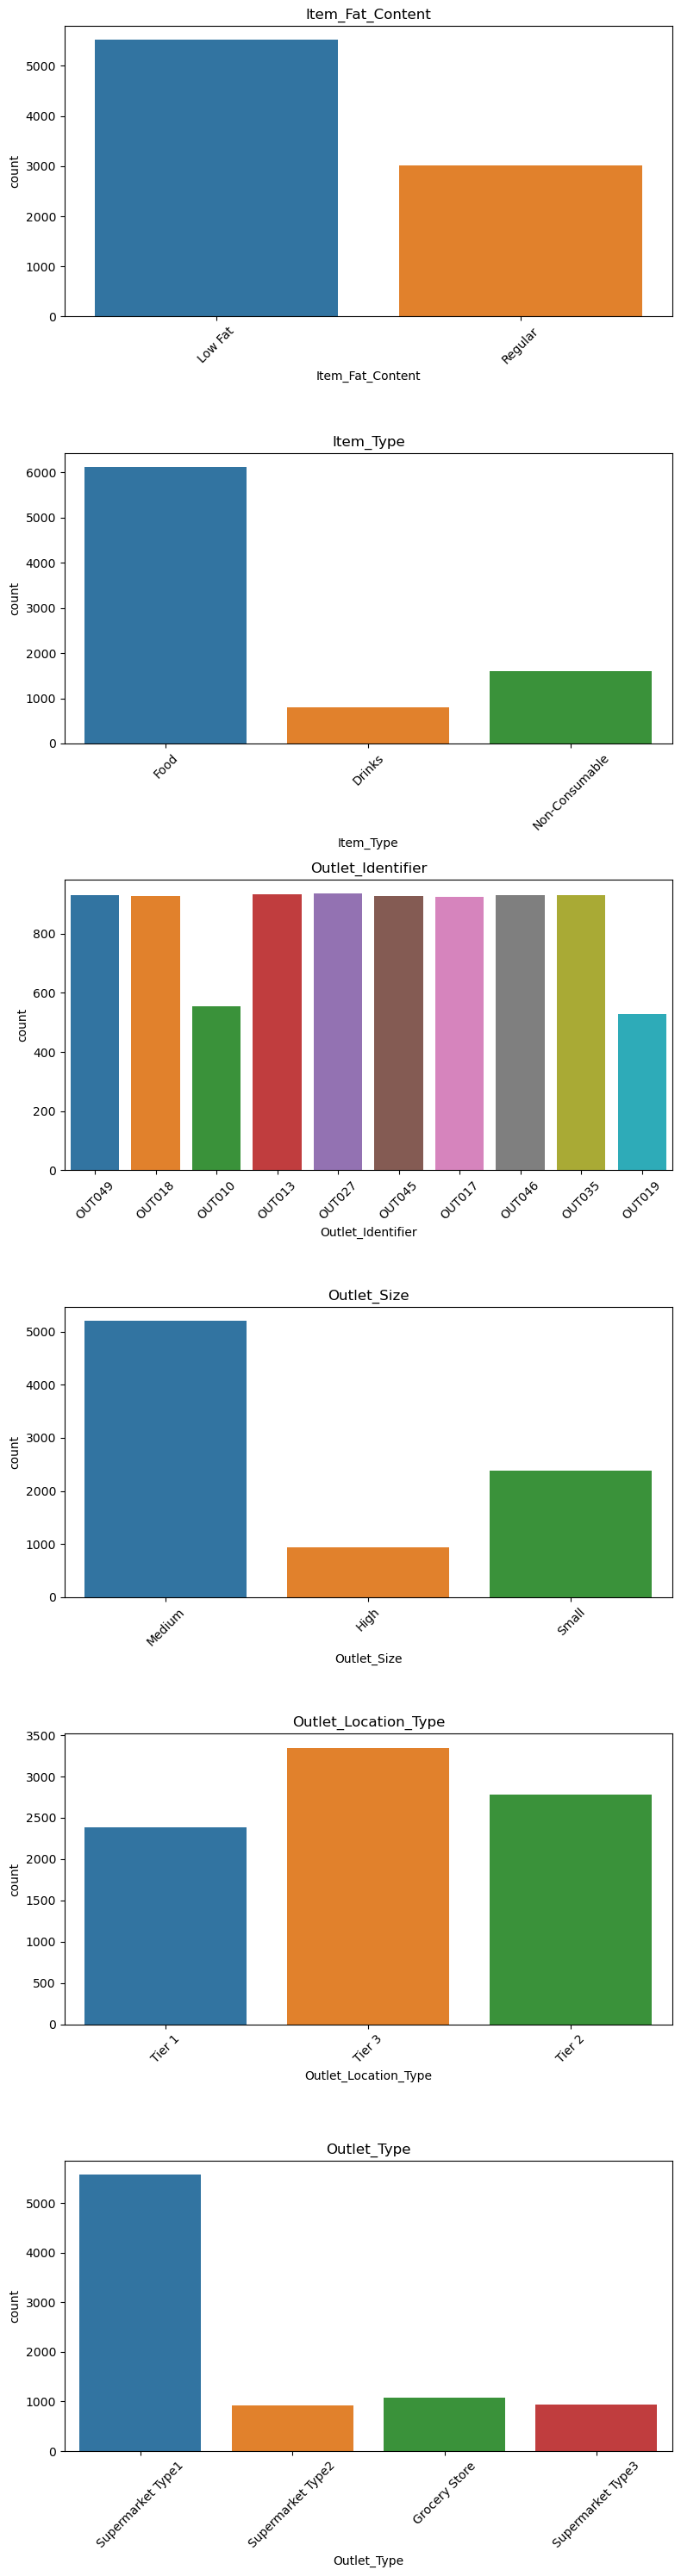

In [30]:
#Countplots of all categorical Features except 'Item_Identifier' as it has 1559 unique values
fig, axes = plt.subplots((len(categorical_variables)-1), 1, figsize=(8, 30))
axes = axes.flatten()

for i, var in enumerate(categorical_variables[1:]):
#    if i!=0:
        sns.countplot(data=df, x=var, ax=axes[i])
        axes[i].set_title(var)
        axes[i].tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels

plt.tight_layout()
plt.show()

Item_Fat_Content: Most Items sold are low Fat.
Item_Type: Food Items are more popular.
Outlet_Identifier: Sold items are ditributed evenly amoung all stores, execpt OUT019 and OUT010.
Outlet_Size: Bigmart Stores are mostly in medium size in this data.
Outlet_Location_Type: Most products are sold in Tier3.
Outlet_Type: Most Store Types are SuperMarket Type1.

__________________________________________________________________________________________


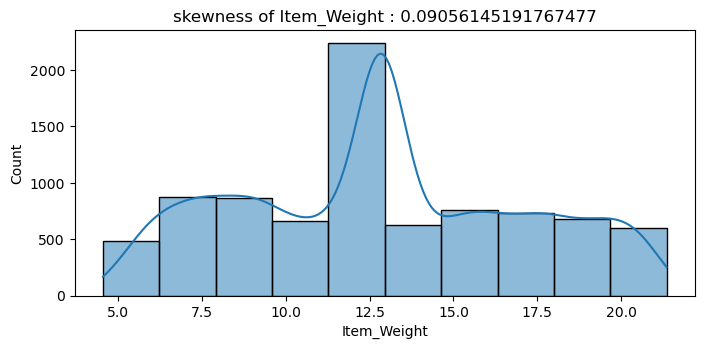

__________________________________________________________________________________________


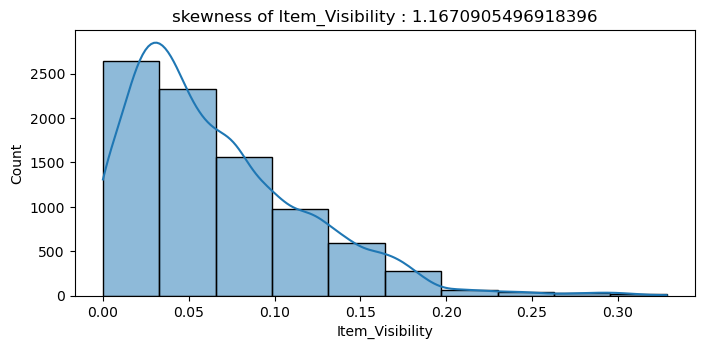

__________________________________________________________________________________________


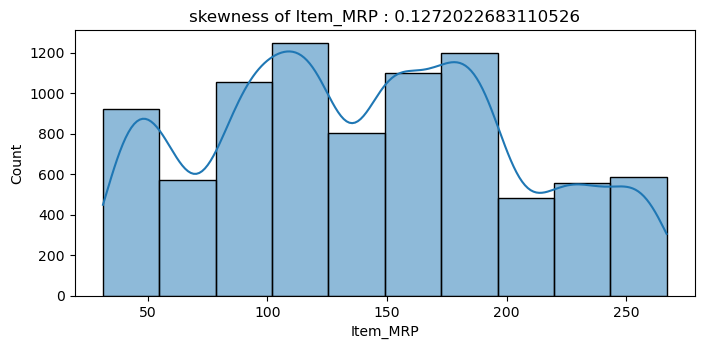

__________________________________________________________________________________________


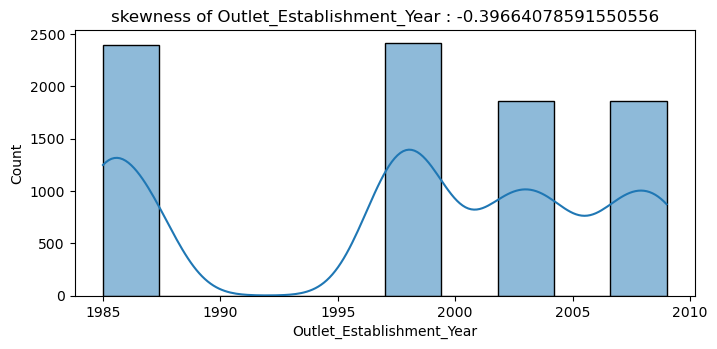

__________________________________________________________________________________________


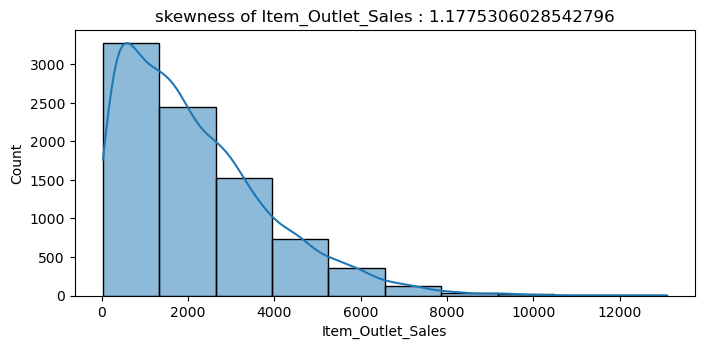

In [31]:
#Distribution and skewness of all numerical features and target feature
for var in numerical_variables:
    plt.figure(figsize=(8,20))
    plt.subplot(len(numerical_variables),1,1)
    ax=sns.histplot(data=df,x=df[var],kde=True,bins=10)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*45)
    plt.show()

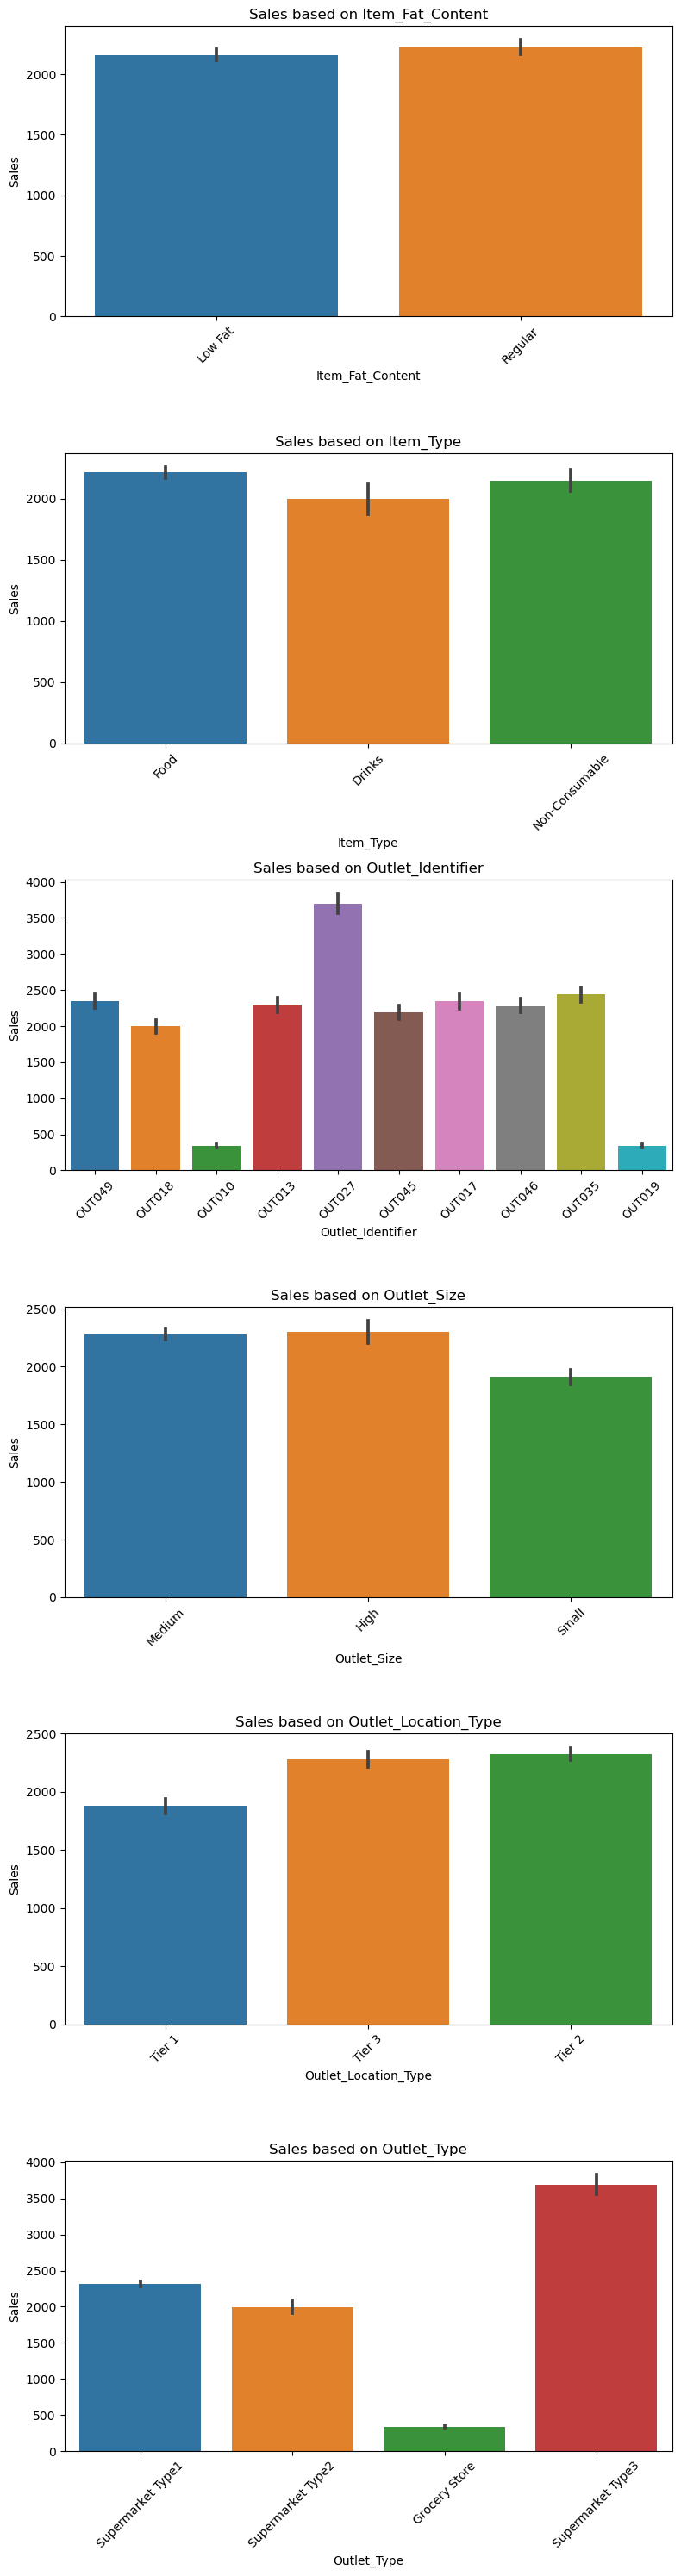

In [32]:
# BarPlot for Sales per categorical features except 'Item_Identifier'

# Create subplots
fig, axes = plt.subplots(len(categorical_variables) - 1, 1, figsize=(8, 30))
axes = axes.flatten()

# Iterate over categorical variables and create bar plots
for i, var in enumerate(categorical_variables[1:]):
    ax = sns.barplot(data=df, x=var, y='Item_Outlet_Sales', ax=axes[i])
    ax.set_title(f'Sales based on {var}')
    
    # Rotate x-axis labels by 90 degrees
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    
    # Set y-axis label
    ax.set_xlabel(var)
    ax.set_ylabel('Sales')

plt.tight_layout()
plt.show()

In [33]:
df.sample(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7412,FDE39,7.890000,Low Fat,0.036128,Food,117.4782,OUT035,2004,Small,Tier 2,Supermarket Type1,2026.0294
5846,FDN12,15.600000,Low Fat,0.081563,Food,112.7544,OUT017,2007,Medium,Tier 2,Supermarket Type1,1118.5440
3004,FDN57,18.250000,Low Fat,0.054455,Food,142.0154,OUT018,2009,Medium,Tier 3,Supermarket Type2,850.8924
3494,FDO11,8.000000,Regular,0.030312,Food,247.4092,OUT049,1999,Medium,Tier 1,Supermarket Type1,6972.2576
3843,FDU34,18.250000,Low Fat,0.075501,Food,123.1046,OUT018,2009,Medium,Tier 3,Supermarket Type2,249.0092
3436,FDK25,12.857645,Regular,0.156072,Food,169.3474,OUT027,1985,Medium,Tier 3,Supermarket Type3,3874.2902
4847,FDU16,19.250000,Regular,0.058227,Food,85.2908,OUT013,1987,High,Tier 3,Supermarket Type1,671.1264
5069,FDF21,10.300000,Regular,0.058778,Food,187.8530,OUT013,1987,High,Tier 3,Supermarket Type1,2656.5420
7730,FDT36,12.300000,Low Fat,0.186251,Food,37.2874,OUT010,1998,Medium,Tier 3,Grocery Store,176.4370
3622,FDU39,18.850000,Low Fat,0.036038,Food,58.4562,OUT046,1997,Small,Tier 1,Supermarket Type1,711.0744


Outlet_Identifier: Outlet027 has most profitable, and Outlet019 and Outlet010 has least Sells.
Outlet_Size: Sells are moreven in Medium and High size Stores.
Outlet_Location_Type: Most sells are through Tier3 and Tier2, Tier2 is slightly higher.
Outlet_Type: Most Sells are through SuperMarket Type3.

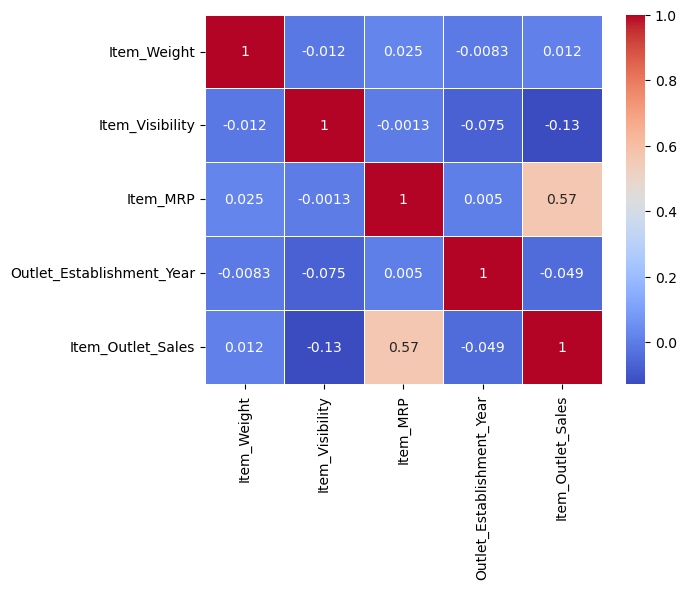

In [34]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',linewidths=0.5)
plt.show()

Item_Visibility has negative correlation with item_outlet_sales so need to drop that column

In [35]:
#df.drop('Item_Visibility', axis=1, inplace=True)

In [36]:
for var in df.columns:
    print(var,'\t',df[var].dtypes,'\t',df[var].nunique())
    print('--'*45)

Item_Identifier 	 object 	 1559
------------------------------------------------------------------------------------------
Item_Weight 	 float64 	 416
------------------------------------------------------------------------------------------
Item_Fat_Content 	 object 	 2
------------------------------------------------------------------------------------------
Item_Visibility 	 float64 	 7880
------------------------------------------------------------------------------------------
Item_Type 	 object 	 3
------------------------------------------------------------------------------------------
Item_MRP 	 float64 	 5938
------------------------------------------------------------------------------------------
Outlet_Identifier 	 object 	 10
------------------------------------------------------------------------------------------
Outlet_Establishment_Year 	 int64 	 9
------------------------------------------------------------------------------------------
Outlet_Size 	 object 	 3
-----

In [37]:
df.sample(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7074,FDI22,12.857645,Low Fat,0.168456,Food,211.0612,OUT019,1985,Small,Tier 1,Grocery Store,418.1224
3541,FDT55,13.600000,Regular,0.043902,Food,157.0946,OUT017,2007,Medium,Tier 2,Supermarket Type1,5522.8110
2742,NCV41,12.857645,Low Fat,0.016956,Non-Consumable,109.3228,OUT027,1985,Medium,Tier 3,Supermarket Type3,2431.5016
7311,FDO45,13.150000,Regular,0.037953,Food,89.5856,OUT046,1997,Small,Tier 1,Supermarket Type1,1494.0552
1582,FDA25,16.500000,Regular,0.068126,Food,101.1990,OUT046,1997,Small,Tier 1,Supermarket Type1,1031.9900
5880,FDG08,12.857645,Regular,0.289523,Food,172.0764,OUT019,1985,Small,Tier 1,Grocery Store,171.7764
4976,FDQ39,14.800000,Low Fat,0.081168,Food,190.5846,OUT049,1999,Medium,Tier 1,Supermarket Type1,3630.6074
1688,FDL12,12.857645,Regular,0.121044,Food,59.4220,OUT027,1985,Medium,Tier 3,Supermarket Type3,1078.5960
7123,FDT09,12.857645,Regular,0.021471,Food,131.0284,OUT019,1985,Small,Tier 1,Grocery Store,131.8284
5427,FDE51,12.857645,Regular,0.168902,Food,43.4086,OUT019,1985,Small,Tier 1,Grocery Store,44.6086


In [38]:
#As Item_Identifier has 1559 unique categorical and 
#Outlet_Identifier has 10 unique categorical values, those are not needed so dropping it
df.drop('Item_Identifier', axis=1, inplace=True)
df.drop('Outlet_Identifier', axis=1, inplace=True)

In [39]:
df.nunique()

Item_Weight                   416
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                       3
Item_MRP                     5938
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

# Data Encoding and Splitting

In [40]:
#To check different categorical feature type
#df.Item_Type.unique()

In [41]:
# Mapping the categorical variables whoes having limited categories
df['Item_Fat_Content'] = df['Item_Fat_Content'].map({'Low Fat':0,'Regular':1})
df['Outlet_Size'] = df['Outlet_Size'].map({'Medium':0,'High':1,'Small':2})
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].map({'Tier 1':0,'Tier 2':1,'Tier 3':2})
df['Outlet_Type'] = df['Outlet_Type'].map({'Supermarket Type1':0,'Supermarket Type2':1,'Supermarket Type3':3,'Grocery Store':4})
df['Item_Type'] = df['Item_Type'].map({'Food':0,'Drinks':1,'Non-Consumable':2})

In [42]:
df.sample(20)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
396,13.800000,1,0.056961,0,230.0984,1999,0,0,0,3707.1744
4398,10.300000,0,0.117594,2,154.4630,2007,0,1,0,2503.4080
3412,13.000000,0,0.154244,0,77.9986,2009,0,2,1,1168.4790
6800,17.250000,0,0.035119,1,93.4120,1999,0,0,0,932.1200
3966,16.250000,0,0.057396,0,125.8046,1997,2,0,0,747.0276
2940,16.100000,0,0.057423,0,253.7356,1998,0,2,4,508.6712
7432,12.800000,1,0.190569,0,138.7838,1998,0,2,4,280.9676
8047,13.500000,0,0.000000,1,189.1872,2004,2,1,0,1890.8720
2742,12.857645,0,0.016956,2,109.3228,1985,0,2,3,2431.5016
4772,12.857645,1,0.076799,1,231.8958,1985,0,2,3,8413.0488


In [43]:
# Checking basic information of dataset after feature encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int64  
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   int64  
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   int64  
 7   Outlet_Location_Type       8523 non-null   int64  
 8   Outlet_Type                8523 non-null   int64  
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 732.4 KB


In [44]:
#Seperating dependent and independent variables
y=df[['Item_Outlet_Sales']]
X=df.drop('Item_Outlet_Sales',axis=1)

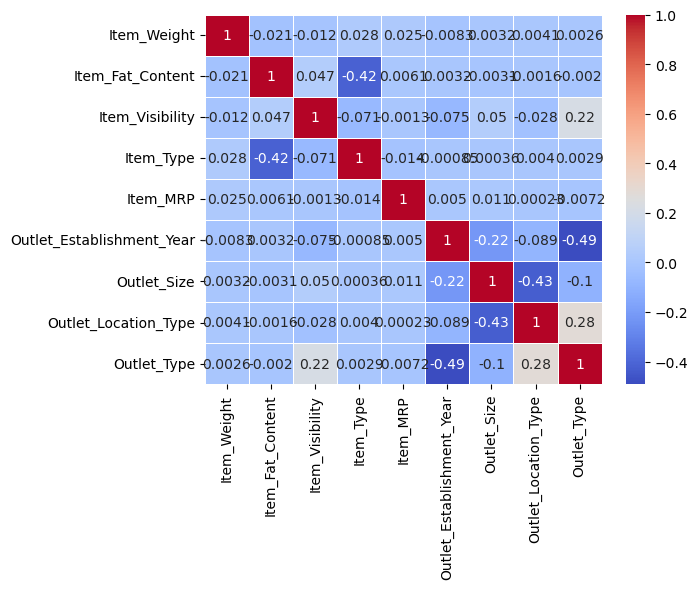

In [45]:
#Check for multicollinearity
sns.heatmap(X.corr(), annot=True, cmap='coolwarm',linewidths=0.5)
plt.show()

The dependent features are not highly correlated so all featured are considered

In [46]:
#X=df.drop('Outlet_Establishment_Year',axis=1)

In [47]:
#Train-Test splitting with resampled data
from sklearn.model_selection import train_test_split

# X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Feature Standarization

In [48]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.transform(X_test)

In [49]:
X_train_Scaled=pd.DataFrame(X_train_Scaled,columns=[X_train.columns])
X_test_Scaled=pd.DataFrame(X_test_Scaled,columns=[X_test.columns])

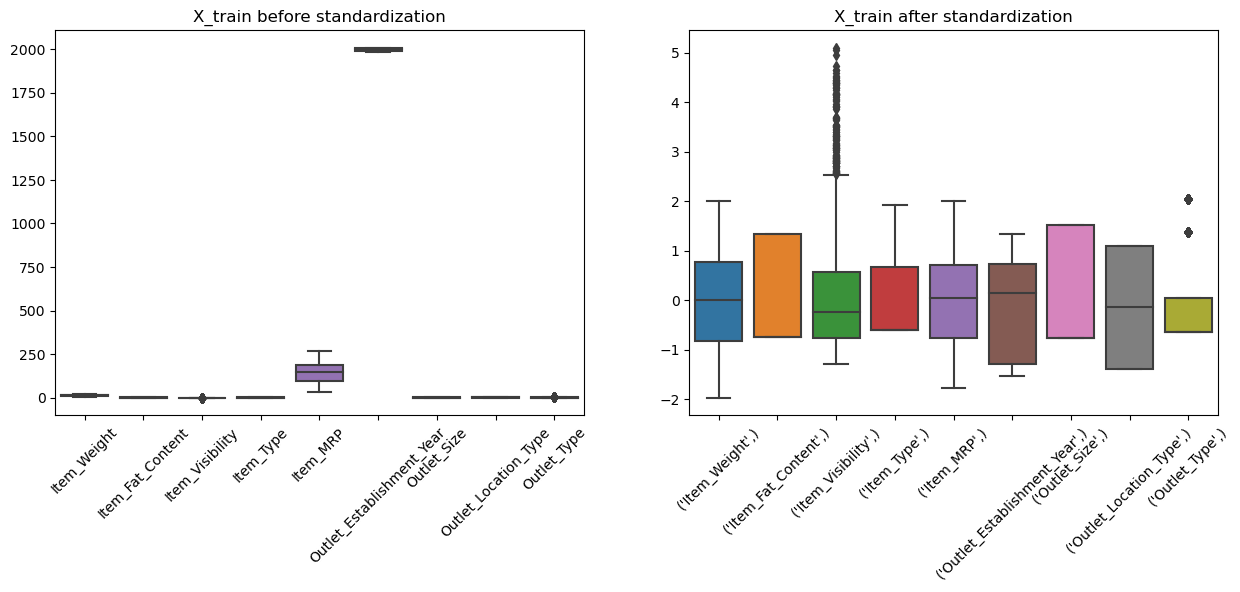

In [50]:
#Box Plots to understand the effect of standarization

# Create a figure with subplots and set the figure size
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# First subplot
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.xticks(rotation=45)
plt.title("X_train before standardization")

# Second subplot
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_Scaled)
plt.xticks(rotation=45)
plt.title("X_train after standardization")

# Display the plot
plt.show()


# Linear Regression Model

Mean Squared Error (MSE): 1708996.0388367893
Root Mean Squared Error (RMSE): 1307.2857525563375
Mean Absolute Error (MAE): 969.1277549294255
R_Square Error:  0.4222559109720775


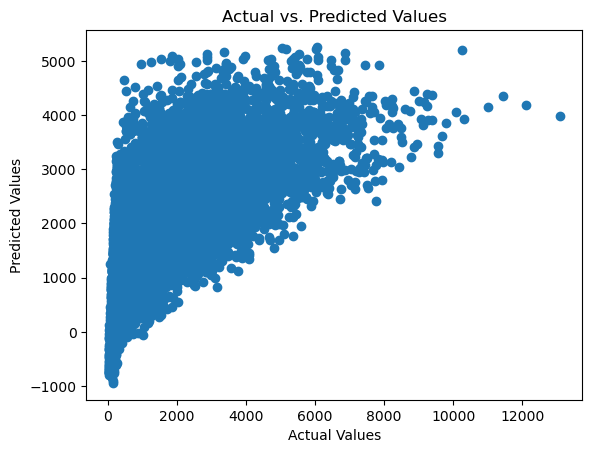

In [51]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score as R2 

from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train_Scaled,y_train)

y_pred=linreg.predict(X_train_Scaled)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_train, y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate the Mean Absolute Error (MAE)
mae= mean_absolute_error(y_train, y_pred)

#Calculate the R_Square Error
R_sqr= R2(y_train, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R_Square Error: ",R_sqr)

#Scatter plot of actual vs. predicted values 
plt.scatter(y_train,y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")


# Display the legend
plt.show()

# Lasso Regression

Mean Squared Error (MSE): 1591367.0320540962
Root Mean Squared Error (RMSE): 1261.4939682987376
R_Square Error:  0.4145016342895197
Mean Absolute Error (MAE): 946.3550266741794


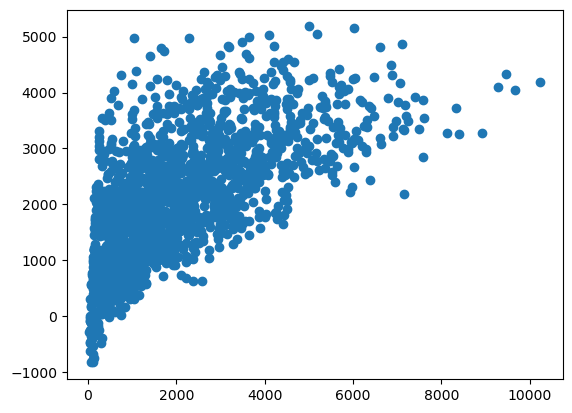

In [52]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train_Scaled,y_train)

y_pred=lasso.predict(X_test_Scaled)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

#Calculate the R_Square Error
R_sqr= R2(y_test, y_pred)

# Calculate the Mean Absolute Error (MAE)
mae= mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R_Square Error: ",R_sqr)
print("Mean Absolute Error (MAE):", mae)

plt.scatter(y_test,y_pred)

# Lasso Cross Validation

Mean Squared Error (MSE): 1591380.769968546
Root Mean Squared Error (RMSE): 1261.4994133841467
R_Square Error:  0.4144965798135273
Mean Absolute Error (MAE): 946.3641395617443


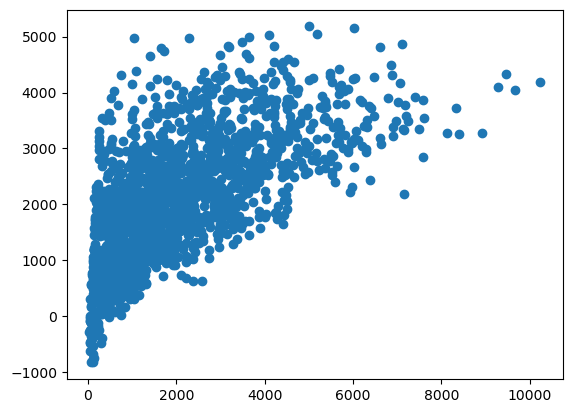

In [53]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_Scaled,y_train)

y_pred=lassocv.predict(X_test_Scaled)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

#Calculate the R_Square Error
R_sqr= R2(y_test, y_pred)

# Calculate the Mean Absolute Error (MAE)
mae= mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R_Square Error: ",R_sqr)
print("Mean Absolute Error (MAE):", mae)

plt.scatter(y_test,y_pred)

# KNN

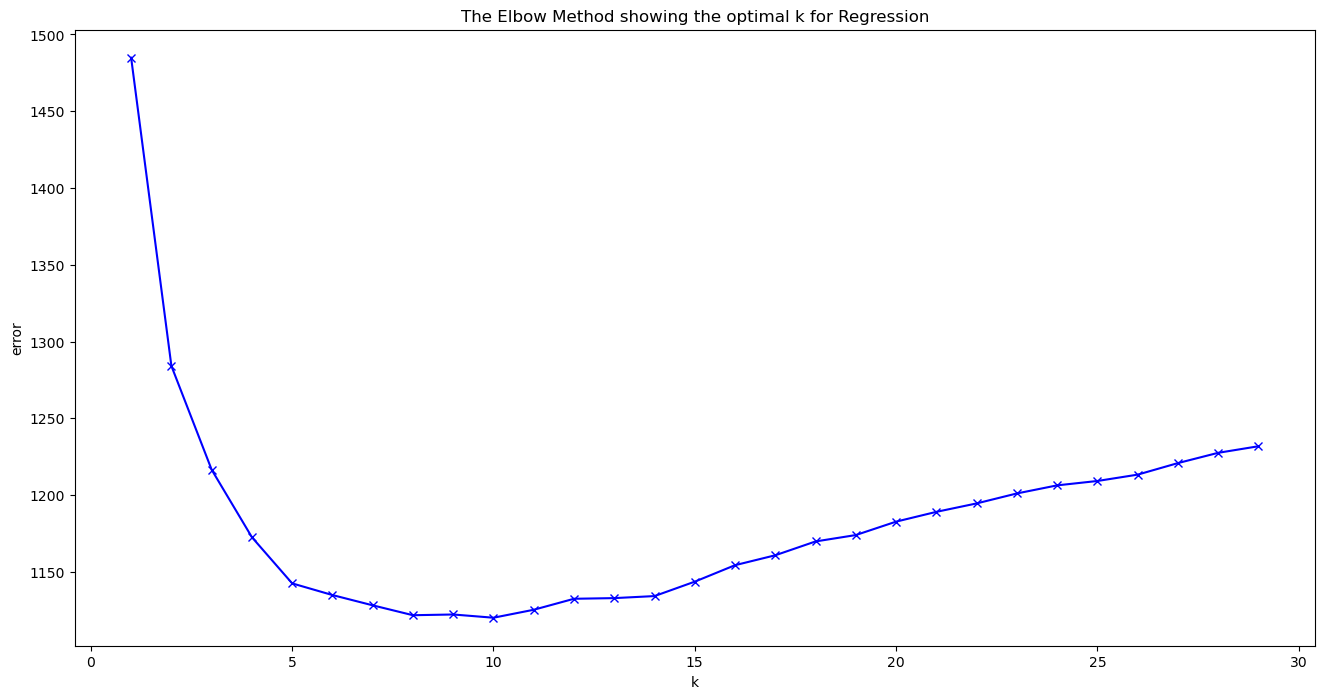

In [56]:
#Optimized value of k
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

error = []

for i in range(1, 30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_KNN = knn.predict(X_test)
    error.append(np.sqrt(mean_squared_error(y_test, y_pred_KNN)))

plt.figure(figsize=(16, 8))
plt.plot(range(1, 30), error, 'bx-')
plt.xlabel('k')
plt.ylabel('error')
plt.title('The Elbow Method showing the optimal k for Regression')
plt.show()


In [57]:
from sklearn.neighbors import KNeighborsRegressor


import numpy as np

# Create the KNN Regressor
k = 10  # You can adjust the number of neighbors (k) as needed
knn = KNeighborsRegressor(n_neighbors=k)

# Train the regressor
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

#Calculate the R_Square Error
R_sqr= R2(y_test, y_pred)

# Calculate the Mean Absolute Error (MAE)
mae= mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R_Square Error: ",R_sqr)
print("Mean Absolute Error (MAE):", mae)



Mean Squared Error (MSE): 1254828.626681613
Root Mean Squared Error (RMSE): 1120.1913348538333
R_Square Error:  0.5383213957747519
Mean Absolute Error (MAE): 792.0894125982405


# Decision Tree

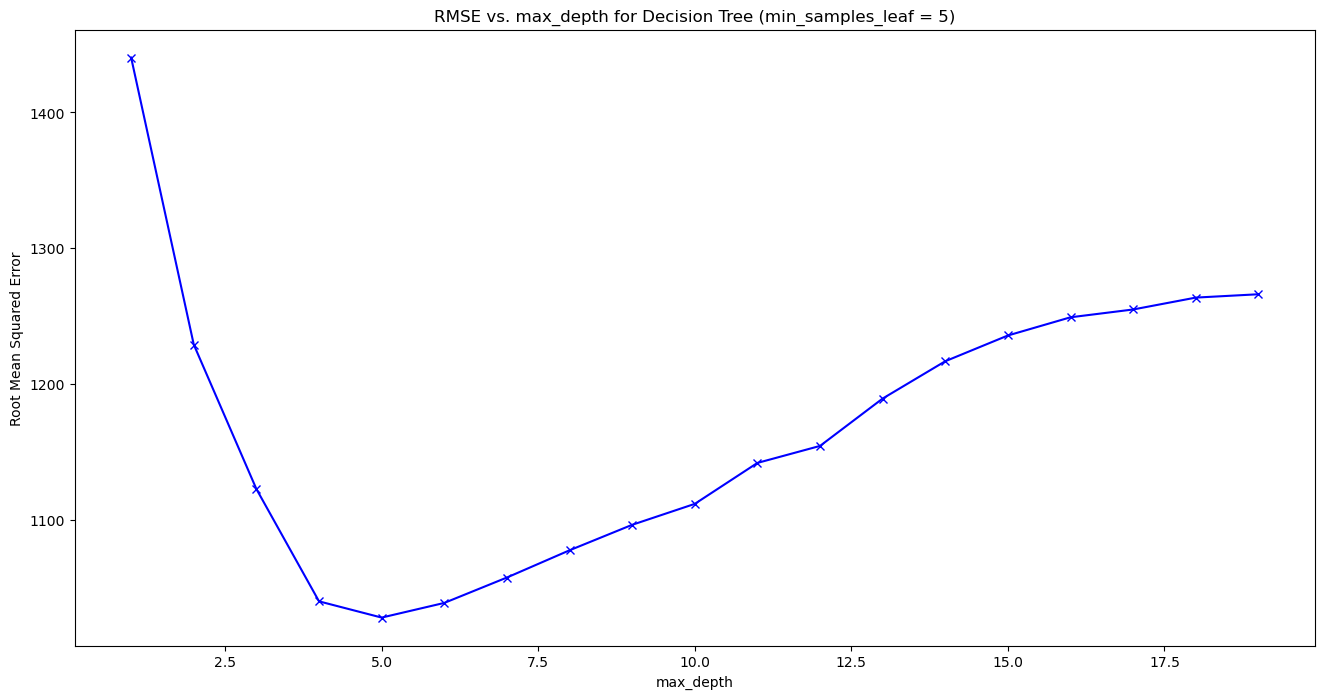

In [58]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.metrics import mean_squared_error

max_depth_values = list(range(1, 20))
min_samples_leaf = 5  # Values to tune

# Create a list to store the results
error = []

for max_depth in max_depth_values:
    clf = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    error.append(np.sqrt(mean_squared_error(y_test, y_pred)))

plt.figure(figsize=(16, 8))
plt.plot(max_depth_values, error, 'bx-')
plt.xlabel('max_depth')
plt.ylabel('Root Mean Squared Error')
plt.title('RMSE vs. max_depth for Decision Tree (min_samples_leaf = 5)')
plt.show()  


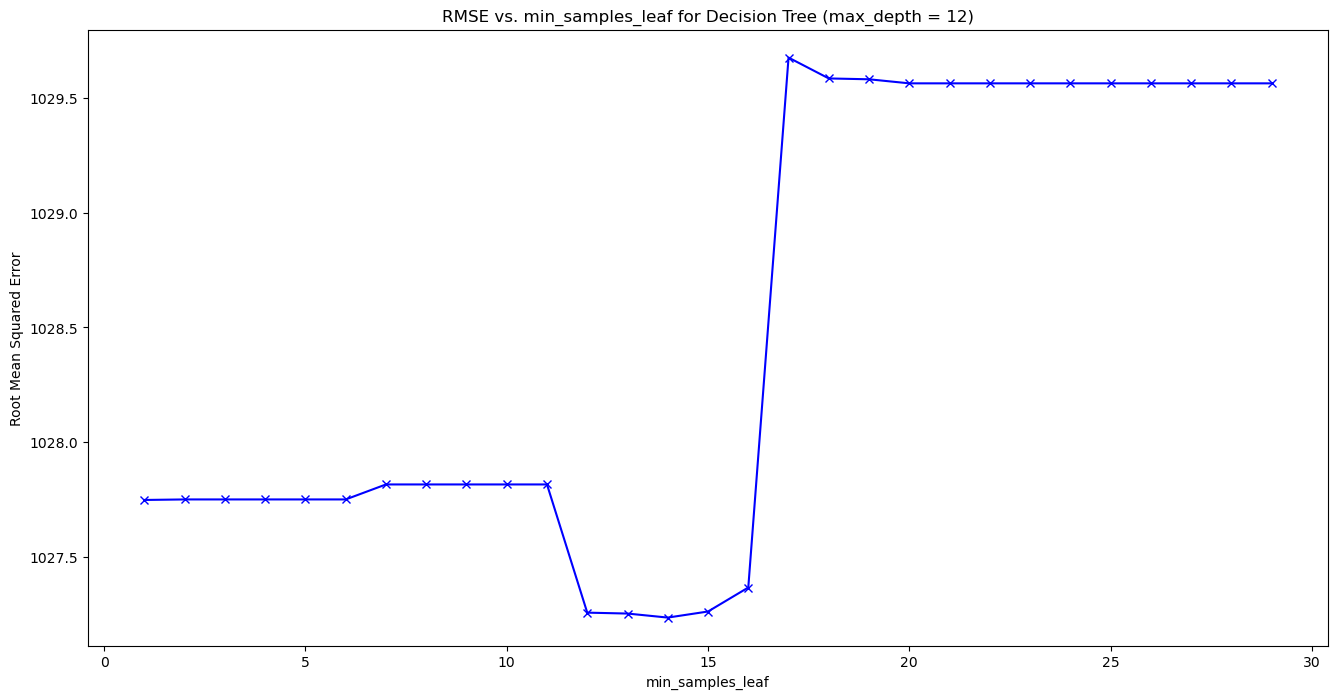

In [59]:
max_depth = 5
min_samples_leaf_values = list(range(1, 30))  # Values to tune

# Create a list to store the results
error = []

for min_samples_leaf in min_samples_leaf_values:
    clf = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    error.append(np.sqrt(mean_squared_error(y_test, y_pred)))

plt.figure(figsize=(16, 8))
plt.plot(min_samples_leaf_values, error, 'bx-')
plt.xlabel('min_samples_leaf')
plt.ylabel('Root Mean Squared Error')
plt.title('RMSE vs. min_samples_leaf for Decision Tree (max_depth = 12)')
plt.show()

In [60]:
from sklearn.tree import DecisionTreeRegressor

# Create the Decision Tree Regressor
tree_reg = DecisionTreeRegressor(max_depth=5,min_samples_leaf=14, random_state=42)

# Train the regressor
tree_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_reg.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

#Calculate the R_Square Error
R_sqr= R2(y_test, y_pred)

# Calculate the Mean Absolute Error (MAE)
mae= mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R_Square Error: ",R_sqr)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 1055212.2353992304
Root Mean Squared Error (RMSE): 1027.2352385891122
R_Square Error:  0.6117645855045275
Mean Absolute Error (MAE): 721.3803505323915


In [61]:
#Optimizing the depth
from sklearn.model_selection import GridSearchCV

# Define a range of depths to search over
depths = list(range(1, 20))  # can be adjusted

# Create a DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()

# Define a parameter grid to search over
param_grid = {'max_depth': depths}

# Create a GridSearchCV object to find the best depth
grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

# Train the model with cross-validation
grid_search.fit(X_train, y_train)

# Get the best depth from the grid search
best_depth = grid_search.best_params_['max_depth']

# Create a Decision Tree Regressor with the best depth
best_tree_reg = DecisionTreeRegressor(max_depth=best_depth)

# Train the optimized regressor
best_tree_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_tree_reg.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate the R-Square Error
R_sqr = R2(y_test, y_pred)

# Calculate the Mean Absolute Error (MAE)
mae= mean_absolute_error(y_test, y_pred)

print("Best Depth:", best_depth)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-Square Error:", R_sqr)
print("Mean Absolute Error (MAE):", mae)


Best Depth: 5
Mean Squared Error (MSE): 1056265.5226447294
Root Mean Squared Error (RMSE): 1027.747791359694
R-Square Error: 0.61137705833547
Mean Absolute Error (MAE): 721.8685835622565


# Random forest 

In [62]:
from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest Regressor
forest_reg = RandomForestRegressor(random_state=42)

# Train the regressor
forest_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = forest_reg.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate the R-squared (R^2) Error
r2 = R2(y_test, y_pred)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)


print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2) Error:", r2)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 1189326.778883081
Root Mean Squared Error (RMSE): 1090.5625974161599
R-squared (R^2) Error: 0.5624209429342493
Mean Absolute Error (MAE): 764.316711711437


# Extreme gradient Boosting

In [63]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Create the XGBoost Regressor
xgb_reg = XGBRegressor(random_state=42)

# Train the regressor
xgb_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_reg.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate the R-squared (R^2) Error
r2 = R2(y_test, y_pred)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2) Error:", r2)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 1295458.1143137207
Root Mean Squared Error (RMSE): 1138.1819337494867
R-squared (R^2) Error: 0.5233729281182693
Mean Absolute Error (MAE): 788.9015306707621


In [64]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Create the XGBoost Regressor
xgb_reg = xgb.XGBRegressor()

# Define hyperparameters to search over
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'learning_rate': [0.05, 0.1, 0.2],  # Step size shrinkage to prevent overfitting
    'max_depth': [3, 4, 5],  # Maximum depth of a tree
    'min_child_weight': [1, 2, 3],  # Minimum sum of instance weight needed in a child
}

# Create GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_xgb_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set
y_pred = best_xgb_model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate the R-squared (R^2) Error
r2 = R2(y_test, y_pred)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2) Error:", r2)
print("Mean Absolute Error (MAE):", mae)


Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100}
Mean Squared Error (MSE): 1044533.9244661658
Root Mean Squared Error (RMSE): 1022.0244245937403
R-squared (R^2) Error: 0.6156933671582403
Mean Absolute Error (MAE): 715.9167267156678


In [69]:
result = pd.DataFrame({'MSE':[1591380.769968546,1254828.626681613,1055212.2353992304,1056265.5226447294,1189326.778883081,1295458.1143137207,1044533.9244661658],
                       'RMSE':[1261.4994133841467,1120.1913348538333,1027.2352385891122,1027.747791359694,1090.5625974161599,1138.1819337494867,1022.0244245937403],
                       'MAE':[946.3641395617443,792.0894125982405,721.3803505323915,721.8685835622565,764.316711711437,788.9015306707621,715.9167267156678],
                       'R^2':[0.4144965798135273,0.5383213957747519,0.6117645855045275,0.61137705833547,0.5624209429342493,0.5233729281182693,0.6156933671582403]}, 
                      index=[
                          'Lasso Cross Validation', 'KNN', 'Decision Tree', 
                          'Decision Tree GridSearchCV', 'Random Forest', 'XGBoost', 'XGBoost GridSearchCV'
                            ])

In [70]:
result

,MSE,RMSE,MAE,R^2
Lasso Cross Validation,1.591381e+06,1261.499413,946.364140,0.414497
KNN,1.254829e+06,1120.191335,792.089413,0.538321
Decision Tree,1.055212e+06,1027.235239,721.380351,0.611765
Decision Tree GridSearchCV,1.056266e+06,1027.747791,721.868584,0.611377
Random Forest,1.189327e+06,1090.562597,764.316712,0.562421
XGBoost,1.295458e+06,1138.181934,788.901531,0.523373
XGBoost GridSearchCV,1.044534e+06,1022.024425,715.916727,0.615693


'''When the establishment year is being dropped then bias varience error are low(Very good model), but when consider both are high so underfitted???''' 